In [1]:
import csv
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

#Have the plot show on following cell after code

In [2]:
#Vanessa's CSV
out_df = pd.read_csv('Quick Facts- Outside CA.csv')
california_df = pd.read_csv('Quick Facts-California.csv')
marital_ca_df = pd.read_csv('California - Marital 3.csv')
marital_out_df = pd.read_csv('Out of State - Marital.csv')

#Emily's API
base_url = "https://api.census.gov/data/2017/acs/acs1/profile"

#Emily's CSV
csv_path = "SF_All_OUT.csv"
sf_out_df = pd.read_csv(csv_path)

#Rebecca's CSV
CA_counties = pd.read_csv("CA_counties.csv")
non_CA_counties = pd.read_csv("non_CA_counties.csv")

#Stefan's CSV
file1 = "EstablishmentData2014.csv" 
file2 = "EstablishmentData2015.csv"
file3 = "EstablishmentData2016.csv"

df_original_1 = pd.read_csv(file1)
df_original_2 = pd.read_csv(file2)
df_original_3 = pd.read_csv(file3)


# Escape the Bay

Emily Todd, Vanessa Oakes, Rebecca Mih, Stefan Zobrist



Question:

* The San Francisco County area and Bay area have some of the highest household incomes in the country due to a high concentration of high-paying high tech industries in Silicon Valley.  Yet many people are leaving San Francisco County.  The question is what motivates people to move?  What are some advantages of other counties?

Parameters:
* Used latest data 2017 unless otherwise noted.
* To organize our data we have separated counties within California and Out of State.


Research:

* We created csvs from https://www.census.gov
* We also use an API

Housing:

* Why are they leaving? 
* Where are they going?
* How's the housing market similar and different against SF County?
* Who are they?

In [3]:
#Top 5 in-CA counties
ranked_sf_out_df = sf_out_df.sort_values(by='Total', ascending=False)
sf_to_ca = ranked_sf_out_df.loc[ranked_sf_out_df["State Name"] == "California",:]
sf_to_ca.head(5)


,State/County FIPS,State FIPS,County FIPS,County Name,State Name,Total,Margin of Error (+/-)
19,'06001','06','001',Alameda County,California,10791,1127
52,'06081','06','081',San Mateo County,California,8995,1054
25,'06013','06','013',Contra Costa County,California,4085,631
34,'06037','06','037',Los Angeles County,California,3726,547
54,'06085','06','085',Santa Clara County,California,3383,447


In [4]:
#Top 5 non-CA counties
sf_not_ca = ranked_sf_out_df.loc[ranked_sf_out_df["State Name"] != "California",:]
sf_not_ca.head(5)

,State/County FIPS,State FIPS,County FIPS,County Name,State Name,Total,Margin of Error (+/-)
259,'36061','36','061',New York County,New York,1419,657
413,'53033','53','033',King County,Washington,1293,336
326,'41051','41','051',Multnomah County,Oregon,1094,282
255,'36047','36','047',Kings County,New York,887,300
131,'17031','17','031',Cook County,Illinois,635,223


#Emily's CSV to show how she got in/out state
Top 5 Counties in California
California
1. Alameda County
2. San Mateo County
3. Contra Costa County
4. Los Angeles County
5. Santa Clara County

Top 5 Counties they leave outside of California
Non – California
1.	New York County (NY)
2.	King County (Washington)
3.	Multnomah County (Oregon)
4.	Kings County (New York)
5.	Cook County (Illinois)


In [5]:
# California - Race

california_df = pd.read_csv('Quick Facts-California.csv')

cols = list(california_df.columns.values)
cols

column_titles = ['Fact',
                'San Francisco County, California',
                'Alameda County, California', 
                 'San Mateo County, California',
                'Contra Costa County, California', 
                 'Los Angeles County, California',
                'Santa Clara County, California']

california_df = california_df.reindex(columns = column_titles)
california_df

#Pulling Race Information
california_race = california_df.iloc[8:16,0:7]
california_race

# # Used Lambda to convert to Float
california_race['Santa Clara County, California'] = california_race['Santa Clara County, California'].apply(lambda x: float(x[:-1]))
california_race['Los Angeles County, California'] = california_race['Los Angeles County, California'].apply(lambda x: float(x[:-1]))
california_race['Contra Costa County, California'] = california_race['Contra Costa County, California'].apply(lambda x: float(x[:-1]))
california_race['San Mateo County, California'] = california_race['San Mateo County, California'].apply(lambda x: float(x[:-1]))
california_race['Alameda County, California'] = california_race['Alameda County, California'].apply(lambda x: float(x[:-1]))
california_race['San Francisco County, California'] = california_race['San Francisco County, California'].apply(lambda x: float(x[:-1]))

#Removed ",percent"
california_race['Fact'] = california_race['Fact'].apply(lambda x: x[:-9])
california_race

# California - Race
#Hispanic is over the 100% should we make it by itself or add it to "white"

race = ["White alone", "Black or African American Alone", "American Indian and Alaska Native alone", "Asian alone",
       "Native Hawaiian and Other Pacific Islander alone", "Two or More Races", "Hispanic or Latino"]

county = ['Santa Clara County, California', 'Los Angeles County, California', 'Contra Costa County, California', 
         'San Mateo County, California', 'Alameda County, California', 'San Francisco County, California']

N = 6
ind = np.arange(N)
width = .75

#White
white = california_race.iloc[0, 1:7]

#African America
aa = california_race.iloc[1, 1:7]

#American Indian & Alaska Native
ai = california_race.iloc[2, 1:7]

#Native Hawaiian and Other Pacific
hawaiian = california_race.iloc[3, 1:7]

#Asian
asian = california_race.iloc[4, 1:7]

#Two or More Races
two = california_race.iloc[5, 1:7]

#Hispanic or Latino
hispanic = california_race.iloc[6, 1:7]


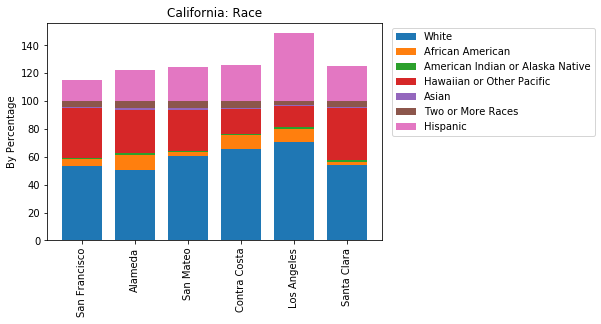

In [6]:
p1 = plt.bar(ind,white,width)
p2 = plt.bar(ind,aa,width, bottom=white)
p3 = plt.bar(ind,ai,width, bottom=white+aa)
p4 = plt.bar(ind,hawaiian,width, bottom=white+aa+ai)
p5 = plt.bar(ind,asian,width, bottom=white+aa+ai+hawaiian)
p6 = plt.bar(ind,two,width, bottom =white+aa+ai+hawaiian+asian)
p7 = plt.bar(ind,hispanic,width, bottom =white+aa+ai+hawaiian+asian+two)


plt.ylabel('By Percentage')
plt.title('California: Race')
plt.xticks(ind, ('San Francisco', 'Alameda', 'San Mateo', 'Contra Costa',
                'Los Angeles', 'Santa Clara'),rotation='vertical')

plt.legend((p1[0], p2[0], p3[0], 
            p4[0], p5[0],p6[0], p7[0]),
           ('White', 'African American', 
            'American Indian or Alaska Native',
            'Hawaiian or Other Pacific', 'Asian', 
            'Two or More Races', 'Hispanic'),loc='upper right',
          bbox_to_anchor =(1.65, 1.0))

plt.show()

In [7]:
# Out of State- Race
out_df = pd.read_csv('Quick Facts- Outside CA.csv')

out_df.drop(columns = ["Fact Note"], inplace=True) 
# out_df.drop(columns = ["Value Note for Cook County, Illinois"], inplace=True)
# out_df.drop(columns = ["Value Note for Kings County (Brooklyn Borough), New York"], inplace=True)
# out_df.drop(columns = ["Value Note for Multnomah County, Oregon"], inplace=True)
# out_df.drop(columns = ["Value Note for King County, Washington"], inplace=True)
# out_df.drop(columns = ["Value Note for New York County (Manhattan Borough), New York"], inplace=True)
# out_df.drop(columns = ["Value Note for San Francisco County, California"], inplace=True)


cols = list(out_df.columns.values)
cols

column_titles = ['Fact',
                'San Francisco County, California',
                'New York County (Manhattan Borough), New York', 
                 'King County, Washington',
                'Multnomah County, Oregon', 
                 'Kings County (Brooklyn Borough), New York',
                'Cook County, Illinois']

out_df.reindex(columns = column_titles)






,Fact,"San Francisco County, California","New York County (Manhattan Borough), New York","King County, Washington","Multnomah County, Oregon","Kings County (Brooklyn Borough), New York","Cook County, Illinois"
0,"Population estimates, July 1, 2017, (V2017)","884,363","1,664,727","2,188,649","807,555","2,648,771","5,211,263"
1,"Population estimates base, April 1, 2010, (V2...","805,193","1,586,184","1,931,281","735,169","2,504,706","5,195,075"
2,"Population, percent change - April 1, 2010 (es...",9.80%,5.00%,13.30%,9.80%,5.80%,0.30%
3,"Population, Census, April 1, 2010","805,235","1,585,873","1,931,249","735,334","2,504,700","5,194,675"
4,"Persons under 5 years, percent",4.50%,4.80%,5.90%,5.60%,7.30%,6.20%
5,"Persons under 18 years, percent",13.40%,14.40%,20.40%,19.10%,22.90%,22.00%
6,"Persons 65 years and over, percent",15.40%,16.00%,13.00%,13.00%,13.50%,14.30%
7,"Female persons, percent",49.00%,52.60%,49.90%,50.50%,52.60%,51.40%
8,"White alone, percent",53.10%,64.40%,68.00%,79.50%,49.20%,65.60%
9,"Black or African American alone, percent",5.50%,17.90%,6.80%,6.00%,34.30%,24.00%


In [8]:
#Pulling Race Information
out_race = out_df.iloc[8:15,0:7]


#Used Lambda to convert to Float
out_race['Cook County, Illinois'] = out_race['Cook County, Illinois'].apply(lambda x: float(x[:-1]))
out_race['Kings County (Brooklyn Borough), New York'] = out_race['Kings County (Brooklyn Borough), New York'].apply(lambda x: float(x[:-1]))
out_race['Multnomah County, Oregon'] = out_race['Multnomah County, Oregon'].apply(lambda x: float(x[:-1]))
out_race['King County, Washington'] = out_race['King County, Washington'].apply(lambda x: float(x[:-1]))
out_race['New York County (Manhattan Borough), New York'] = out_race['New York County (Manhattan Borough), New York'].apply(lambda x: float(x[:-1]))
out_race['San Francisco County, California'] = out_race['San Francisco County, California'].apply(lambda x: float(x[:-1]))

#Removed ",percent"
out_race['Fact'] = out_race['Fact'].apply(lambda x: x[:-9])
out_race


,Fact,"San Francisco County, California","New York County (Manhattan Borough), New York","King County, Washington","Multnomah County, Oregon","Kings County (Brooklyn Borough), New York","Cook County, Illinois"
8,White alone,53.1,64.4,68.0,79.5,49.2,65.6
9,Black or African American alone,5.5,17.9,6.8,6.0,34.3,24.0
10,American Indian and Alaska Native alone,0.7,1.2,1.0,1.4,0.9,0.7
11,Asian alone,35.9,13.0,18.2,7.9,12.8,7.7
12,Native Hawaiian and Other Pacific Islander alone,0.4,0.2,0.9,0.7,0.1,0.1
13,Two or More Races,4.3,3.4,5.1,4.6,2.6,1.9
14,Hispanic or Latino,15.2,26.1,9.7,11.6,19.1,25.5


In [9]:

race = ["White alone", "Black or African American Alone", "American Indian and Alaska Native alone", "Asian alone",
        "Native Hawaiian and Other Pacific Islander alone", "Two or More Races", "Hispanic or Latino"]

county = ['San Francisco County, California',
                 'New York County (Manhattan Borough), New York', 
                  'King County, Washington',
                 'Multnomah County, Oregon', 
                  'Kings County (Brooklyn Borough), New York',
                 'Cook County, Illinois']

N = 6
ind = np.arange(N)
width = .75

#White
white = out_race.iloc[0, 1:7]

#African America
aa = out_race.iloc[1, 1:7]

#American Indian & Alaska Native
ai = out_race.iloc[2, 1:7]

#Native Hawaiian and Other Pacific
hawaiian = out_race.iloc[3, 1:7]

#Asian
asian = out_race.iloc[4, 1:7]

#Two or More Races
two = out_race.iloc[5, 1:7]

#Hispanic or Latino
hispanic = out_race.iloc[6, 1:7]

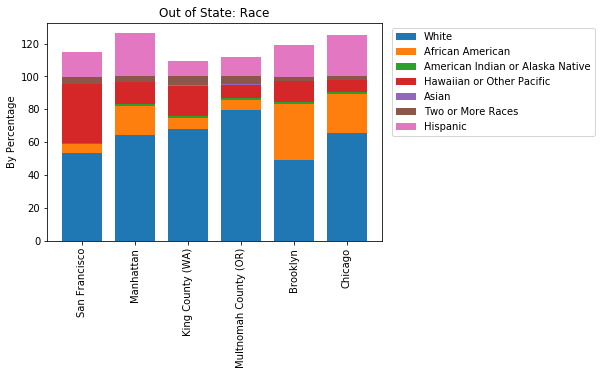

In [10]:
p1 = plt.bar(ind,white,width)
p2 = plt.bar(ind,aa,width, bottom=white)
p3 = plt.bar(ind,ai,width, bottom=white+aa)
p4 = plt.bar(ind,hawaiian,width, bottom=white+aa+ai)
p5 = plt.bar(ind,asian,width, bottom=white+aa+ai+hawaiian)
p6 = plt.bar(ind,two,width, bottom =white+aa+ai+hawaiian+asian)
p7 = plt.bar(ind,hispanic,width, bottom =white+aa+ai+hawaiian+asian+two)

plt.ylabel('By Percentage')
plt.title('Out of State: Race')
plt.xticks(ind, ('San Francisco', 'Manhattan', 'King County (WA)', 'Multnomah County (OR)',
                 'Brooklyn', 'Chicago'),rotation='vertical')

plt.legend((p1[0], p2[0], p3[0], 
             p4[0], p5[0],p6[0], p7[0]),
            ('White', 'African American', 
             'American Indian or Alaska Native',
             'Hawaiian or Other Pacific', 'Asian', 
             'Two or More Races', 'Hispanic'),loc='upper right',
           bbox_to_anchor =(1.65, 1.0))

plt.show()

In [11]:
# California - Age

california_age =california_df.iloc[4:7,0:7]
california_age['Los Angeles County, California'] = california_age['Los Angeles County, California'].apply(lambda x: float(x[:-1]))
california_age['Santa Clara County, California'] = california_age['Santa Clara County, California'].apply(lambda x: float(x[:-1]))
california_age['Contra Costa County, California'] = california_age['Contra Costa County, California'].apply(lambda x: float(x[:-1]))
california_age['San Mateo County, California'] = california_age['San Mateo County, California'].apply(lambda x: float(x[:-1]))
california_age['Alameda County, California'] = california_age['Alameda County, California'].apply(lambda x: float(x[:-1]))
california_age['San Francisco County, California'] = california_age['San Francisco County, California'].apply(lambda x: float(x[:-1]))

california_age

,Fact,"San Francisco County, California","Alameda County, California","San Mateo County, California","Contra Costa County, California","Los Angeles County, California","Santa Clara County, California"
4,"Persons under 5 years, percent",4.5,5.9,5.7,5.7,6.1,6.1
5,"Persons under 18 years, percent",13.4,20.7,20.8,22.8,21.9,22.2
6,"Persons 65 years and over, percent",15.4,13.5,15.8,15.3,13.2,13.1


In [12]:
# California - Age (bar)

county = ['Santa Clara County, California', 'Los Angeles County, California', 'Contra Costa County, California', 
         'San Mateo County, California', 'Alameda County, California', 'San Francisco County, California']

age = ['under 5 years','under 18 years','65 years and over, percent']

N = 6
ind = np.arange(N)
width = 0.50


#Under 5
under_5 = california_age.iloc[0, 1:7]

#Under 18
under_18 = california_age.iloc[1, 1:7]

#Over 65
over_65 = california_age.iloc[2, 1:7]

#18-65
middle_age = 100-under_5-under_18-over_65

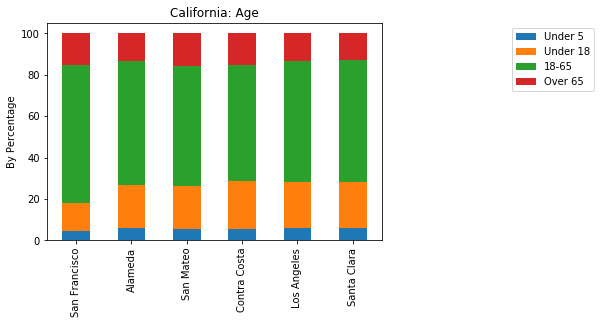

In [13]:
#Plot
p1 = plt.bar(ind,under_5,width)
p2 = plt.bar(ind,under_18,width,bottom=under_5)
p3 = plt.bar(ind,middle_age, width,bottom=under_5+under_18)
p4 = plt.bar(ind,over_65,width,bottom=under_5+under_18+middle_age)

plt.legend((p1[0], p2[0], p3[0],p4[0]),
           ('Under 5', 'Under 18', '18-65', 
            'Over 65',),loc='upper right',
          bbox_to_anchor =(1.65, 1.0))

plt.ylabel('By Percentage')
plt.title('California: Age')
plt.xticks(ind, ('San Francisco', 'Alameda', 'San Mateo', 'Contra Costa',
                'Los Angeles', 'Santa Clara'),rotation='vertical')

plt.show()

In [14]:
# Out of California: Age

out_df = pd.read_csv('Quick Facts- Outside CA.csv')

out_df.drop(columns = ["Fact Note"], inplace=True)

cols = list(out_df.columns.values)
cols

column_titles = ['Fact',
                'San Francisco County, California',
                'New York County (Manhattan Borough), New York', 
                 'King County, Washington',
                'Multnomah County, Oregon', 
                 'Kings County (Brooklyn Borough), New York',
                'Cook County, Illinois']

out_df.reindex(columns = column_titles)

out_age =out_df.iloc[4:7,0:7]
out_age.head(20)

,Fact,"San Francisco County, California","New York County (Manhattan Borough), New York","King County, Washington","Multnomah County, Oregon","Kings County (Brooklyn Borough), New York","Cook County, Illinois"
4,"Persons under 5 years, percent",4.50%,4.80%,5.90%,5.60%,7.30%,6.20%
5,"Persons under 18 years, percent",13.40%,14.40%,20.40%,19.10%,22.90%,22.00%
6,"Persons 65 years and over, percent",15.40%,16.00%,13.00%,13.00%,13.50%,14.30%


In [15]:
out_age['Cook County, Illinois'] = out_age['Cook County, Illinois'].apply(lambda x: float(x[:-1]))
out_age['Kings County (Brooklyn Borough), New York'] = out_age['Kings County (Brooklyn Borough), New York'].apply(lambda x: float(x[:-1]))
out_age['Multnomah County, Oregon'] = out_age['Multnomah County, Oregon'].apply(lambda x: float(x[:-1]))
out_age['King County, Washington'] = out_age['King County, Washington'].apply(lambda x: float(x[:-1]))
out_age['New York County (Manhattan Borough), New York'] = out_age['New York County (Manhattan Borough), New York'].apply(lambda x: float(x[:-1]))
out_age['San Francisco County, California'] = out_age['San Francisco County, California'].apply(lambda x: float(x[:-1]))
out_age

,Fact,"San Francisco County, California","New York County (Manhattan Borough), New York","King County, Washington","Multnomah County, Oregon","Kings County (Brooklyn Borough), New York","Cook County, Illinois"
4,"Persons under 5 years, percent",4.5,4.8,5.9,5.6,7.3,6.2
5,"Persons under 18 years, percent",13.4,14.4,20.4,19.1,22.9,22.0
6,"Persons 65 years and over, percent",15.4,16.0,13.0,13.0,13.5,14.3


In [16]:
# Out of State: Age

county = ['San Francisco County, California',
                'New York County (Manhattan Borough), New York', 
                 'King County, Washington',
                'Multnomah County, Oregon', 
                 'Kings County (Brooklyn Borough), New York',
                'Cook County, Illinois']

age = ['under 5 years','under 18 years','65 years and over, percent']

N = 6
ind = np.arange(N)
width = 0.50

#Under 5
under_5 = out_age.iloc[0, 1:7]

#Under 18
under_18 = out_age.iloc[1, 1:7]

#Over 65
over_65 = out_age.iloc[2, 1:7]

#18-65
middle_age = 100-under_5-under_18-over_65

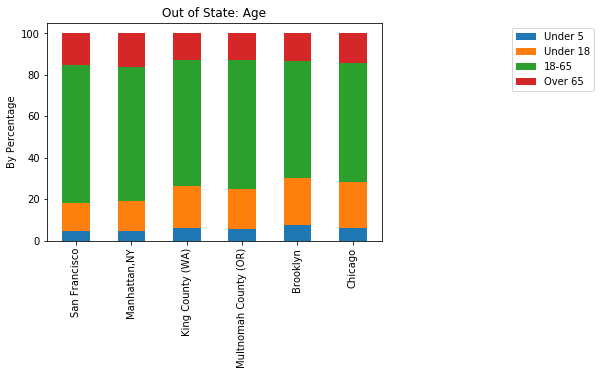

In [17]:
#Plot
p1 = plt.bar(ind,under_5,width)
p2 = plt.bar(ind,under_18,width,bottom=under_5)
p3 = plt.bar(ind,middle_age,width,bottom=under_5+under_18)
p4 = plt.bar(ind,over_65,width,bottom=under_5+under_18+middle_age)

plt.legend((p1[0], p2[0], p3[0],p4[0]),
           ('Under 5', 'Under 18', '18-65', 
            'Over 65',),loc='upper right',
          bbox_to_anchor =(1.65, 1.0))

plt.ylabel('By Percentage')
plt.title('Out of State: Age')
plt.xticks(ind, ('San Francisco', 'Manhattan,NY', 'King County (WA)', 'Multnomah County (OR)',
                'Brooklyn', 'Chicago'),rotation='vertical')

plt.show()

# #Millenials taking over. 

In [18]:
# California - Marital Male (bar)

marital_ca_df = pd.read_csv('California - Marital 3.csv')

marital_ca_df=marital_ca_df.transpose()

marital_ca_df.head(115-150)

marital_ca_df.to_csv('california_marital_transpose.csv')

marital_ca_df = marital_ca_df.reindex(columns = [3, 0, 4, 1, 2, 5])

male_single= marital_ca_df.iloc[25]
male_married=marital_ca_df.iloc[17]
male_widowed=marital_ca_df.iloc[19]
male_divorced=marital_ca_df.iloc[21]
male_separated=marital_ca_df.iloc[23]


female_single= marital_ca_df.iloc[109]
female_married=marital_ca_df.iloc[101]
female_widowed=marital_ca_df.iloc[103]
female_divorced=marital_ca_df.iloc[105]
female_separated=marital_ca_df.iloc[107]

N = 6
ind = np.arange(N)
width = 0.50

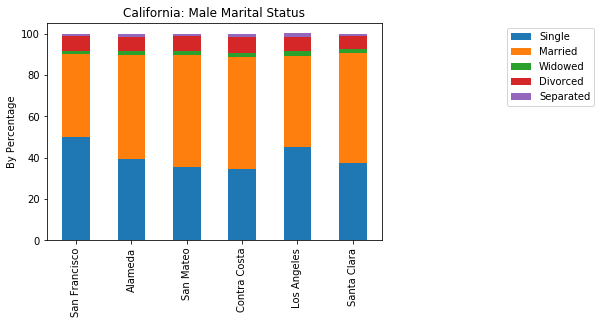

In [19]:
p1 = plt.bar(ind,male_single,width)
p2 = plt.bar(ind,male_married,width,bottom = male_single)
p3 = plt.bar(ind,male_widowed,width,bottom = male_single+male_married)
p4 = plt.bar(ind,male_divorced,width,bottom =male_single+male_married+male_widowed)
p5 = plt.bar(ind,male_separated,width,bottom= male_single+male_married+male_widowed+male_divorced)

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]),
           ('Single', 'Married', "Widowed", "Divorced", "Separated"),loc='upper right',
          bbox_to_anchor =(1.65, 1.0))

plt.ylabel('By Percentage')
plt.title('California: Male Marital Status')
plt.xticks(ind, ('San Francisco', 'Alameda', 'San Mateo', 'Contra Costa',
                'Los Angeles', 'Santa Clara'),rotation='vertical')

plt.show()

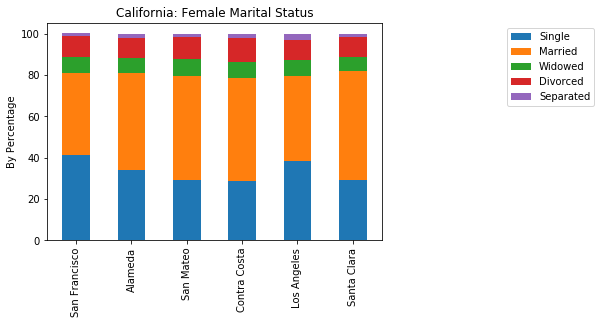

In [20]:
#Female Marital Status

N = 6
ind = np.arange(N)
width = 0.50

p1 = plt.bar(ind,female_single,width)
p2 = plt.bar(ind,female_married,width,bottom = female_single)
p3 = plt.bar(ind,female_widowed,width,bottom = female_single+female_married)
p4 = plt.bar(ind,female_divorced,width,bottom =female_single+female_married+female_widowed)
p5 = plt.bar(ind,female_separated,width,bottom= female_single+female_married+female_widowed+female_divorced)


plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]),
           ('Single', 'Married', "Widowed", "Divorced", "Separated"),loc='upper right',
          bbox_to_anchor =(1.65, 1.0))

plt.ylabel('By Percentage')
plt.title('California: Female Marital Status')
plt.xticks(ind, ('San Francisco', 'Alameda', 'San Mateo', 'Contra Costa',
                'Los Angeles', 'Santa Clara'),rotation='vertical')

plt.show()

#More people are married in Santa Clara,San Mateo, Contra Costa

In [21]:
#Out of State: Male Marital Status
marital_out_df = pd.read_csv('Out of State - Marital.csv')

marital_out_df=marital_out_df.transpose()

marital_out_df.head(115-150)

marital_out_df.to_csv('outstate_marital_transpose.csv')

marital_out_df = marital_out_df.reindex(columns = [0, 3, 5, 4, 2, 1])

N = 6
ind = np.arange(N)
width = 0.50

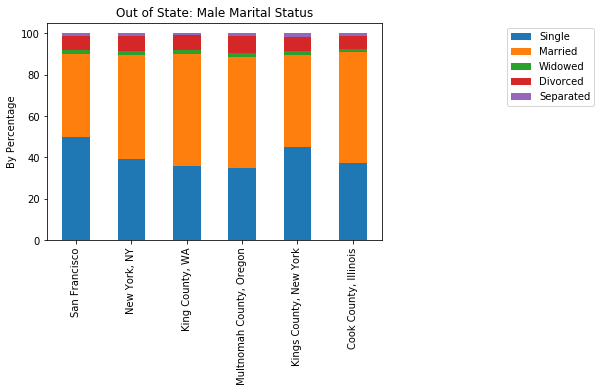

In [22]:
p1 = plt.bar(ind,male_single,width)
p2 = plt.bar(ind,male_married,width,bottom = male_single)
p3 = plt.bar(ind,male_widowed,width,bottom = male_single+male_married)
p4 = plt.bar(ind,male_divorced,width,bottom =male_single+male_married+male_widowed)
p5 = plt.bar(ind,male_separated,width,bottom= male_single+male_married+male_widowed+male_divorced)


plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]),
           ('Single', 'Married', "Widowed", "Divorced", "Separated"),loc='upper right',
          bbox_to_anchor =(1.65, 1.0))

plt.ylabel('By Percentage')
plt.title('Out of State: Male Marital Status')
plt.xticks(ind, ('San Francisco', 'New York, NY', 'King County, WA', 'Multnomah County, Oregon',
                'Kings County, New York', 'Cook County, Illinois'),rotation='vertical')

plt.show()

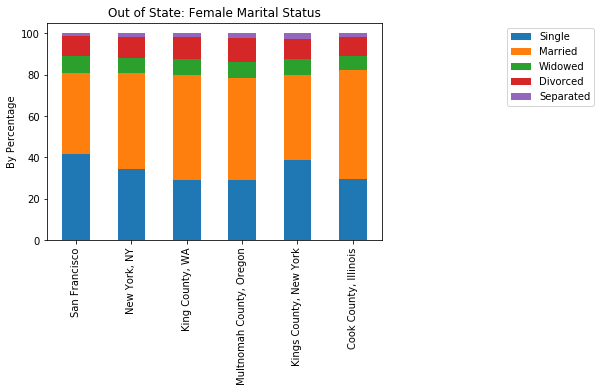

In [23]:
# Out of state: Female Marital Status
N = 6
ind = np.arange(N)
width = 0.50

p1 = plt.bar(ind,female_single,width)
p2 = plt.bar(ind,female_married,width,bottom = female_single)
p3 = plt.bar(ind,female_widowed,width,bottom = female_single+female_married)
p4 = plt.bar(ind,female_divorced,width,bottom =female_single+female_married+female_widowed)
p5 = plt.bar(ind,female_separated,width,bottom= female_single+female_married+female_widowed+female_divorced)


plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]),
           ('Single', 'Married', "Widowed", "Divorced", "Separated"),loc='upper right',
          bbox_to_anchor =(1.65, 1.0))

plt.ylabel('By Percentage')
plt.title('Out of State: Female Marital Status')
plt.xticks(ind, ('San Francisco', 'New York, NY', 'King County, WA', 'Multnomah County, Oregon',
                'Kings County, New York', 'Cook County, Illinois'),rotation='vertical')

plt.show()

#Emily info
Motivations
Why are they leaving? 
Where are they going?
How's the housing market similar and different against SF County

In [24]:
#Emily's housing analysis using census API

#dictionary for in-CA counties

base_url = "https://api.census.gov/data/2017/acs/acs1/profile"

ca_cty_name = ["San Francisco","Alameda","San Mateo","Contra Costa","Los Angeles","Santa Clara"]
ca_st_fips = ["06","06","06","06","06","06"]
ca_cty_fips = ["075","001","081","013","037","085"]

in_ca_dict = {
    "County Name": ca_cty_name,
    "State_FIPS": ca_st_fips,
    "County_FIPS": ca_cty_fips
}

in_ca_df = pd.DataFrame(in_ca_dict)
print(in_ca_df)

#dictionary for non-CA counties

nonca_cty_name = ["San Francisco","New York County","King County","Multnomah County","Kings County","Cook County"]
nonca_st_fips = ["06","36","53","41","36","17"]
nonca_cty_fips = ["075","061","033","051","047","031"]

non_ca_dict = {
    "County Name": nonca_cty_name,
    "State_FIPS": nonca_st_fips,
    "County_FIPS": nonca_cty_fips
}

non_ca_df = pd.DataFrame(non_ca_dict)
print(non_ca_df)

     County Name State_FIPS County_FIPS
0  San Francisco         06         075
1        Alameda         06         001
2      San Mateo         06         081
3   Contra Costa         06         013
4    Los Angeles         06         037
5    Santa Clara         06         085
        County Name State_FIPS County_FIPS
0     San Francisco         06         075
1   New York County         36         061
2       King County         53         033
3  Multnomah County         41         051
4      Kings County         36         047
5       Cook County         17         031


In [25]:
#collect median home values by county and add to data frames

ca_med_home_val = []
med_home_var = "DP04_0089E"
    
for county_id, state_id in zip(ca_cty_fips, ca_st_fips):
    med_home_val = requests.get(f"{base_url}?get={med_home_var}&for=county:{county_id}&in=state:{state_id}").json()
    ca_med_home_val.append(int(med_home_val[1][0]))
    
in_ca_df["Med_Home_Value"] = ca_med_home_val
print(in_ca_df)

non_ca_med_home_val = []
med_home_var = "DP04_0089E"

for county_id, state_id in zip(nonca_cty_fips, nonca_st_fips):
    med_home_val = requests.get(f"{base_url}?get={med_home_var}&for=county:{county_id}&in=state:{state_id}").json()
    non_ca_med_home_val.append(int(med_home_val[1][0]))
    
non_ca_df["Med_Home_Value"] = non_ca_med_home_val
print(non_ca_df)

     County Name State_FIPS County_FIPS  Med_Home_Value
0  San Francisco         06         075         1104100
1        Alameda         06         001          781000
2      San Mateo         06         081         1087100
3   Contra Costa         06         013          642300
4    Los Angeles         06         037          588700
5    Santa Clara         06         085          971300
        County Name State_FIPS County_FIPS  Med_Home_Value
0     San Francisco         06         075         1104100
1   New York County         36         061          976100
2       King County         53         033          563600
3  Multnomah County         41         051          393900
4      Kings County         36         047          701800
5       Cook County         17         031          247600


(0, 1200000)

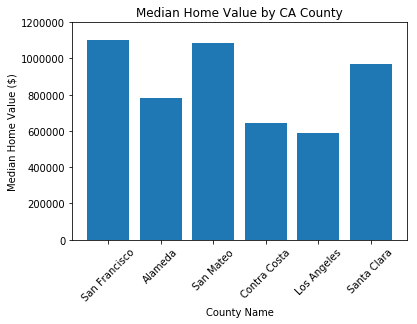

In [26]:
#plot in-CA median home values

x_axis = np.arange(len(ca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, ca_med_home_val)
plt.xticks(tick_locations, ca_cty_name, rotation=45)

plt.title("Median Home Value by CA County")
plt.xlabel("County Name")
plt.ylabel("Median Home Value ($)")
plt.ylim(0, 1200000)

(0, 1200000)

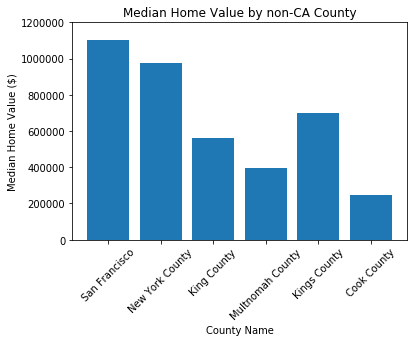

In [27]:
#plot non-CA median home values

x_axis = np.arange(len(nonca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, non_ca_med_home_val)
plt.xticks(tick_locations, nonca_cty_name, rotation=45)

plt.title("Median Home Value by non-CA County")
plt.xlabel("County Name")
plt.ylabel("Median Home Value ($)")
plt.ylim(0, 1200000)

In [28]:
#follow the same process for median gross rents

ca_med_rent = []
med_rent_var = "DP04_0134E"
    
for county_id, state_id in zip(ca_cty_fips, ca_st_fips):
    med_rent = requests.get(f"{base_url}?get={med_rent_var}&for=county:{county_id}&in=state:{state_id}").json()
    ca_med_rent.append(int(med_rent[1][0]))
    
in_ca_df["Med_Rent"] = ca_med_rent
print(in_ca_df)

non_ca_med_rent = []
med_rent_var = "DP04_0134E"

for county_id, state_id in zip(nonca_cty_fips, nonca_st_fips):
    med_rent= requests.get(f"{base_url}?get={med_rent_var}&for=county:{county_id}&in=state:{state_id}").json()
    non_ca_med_rent.append(int(med_rent[1][0]))
    
non_ca_df["Med_Rent"] = non_ca_med_rent
print(non_ca_df)

     County Name State_FIPS County_FIPS  Med_Home_Value  Med_Rent
0  San Francisco         06         075         1104100      1836
1        Alameda         06         001          781000      1745
2      San Mateo         06         081         1087100      2259
3   Contra Costa         06         013          642300      1766
4    Los Angeles         06         037          588700      1402
5    Santa Clara         06         085          971300      2229
        County Name State_FIPS County_FIPS  Med_Home_Value  Med_Rent
0     San Francisco         06         075         1104100      1836
1   New York County         36         061          976100      1601
2       King County         53         033          563600      1555
3  Multnomah County         41         051          393900      1199
4      Kings County         36         047          701800      1367
5       Cook County         17         031          247600      1082


(0, 2500)

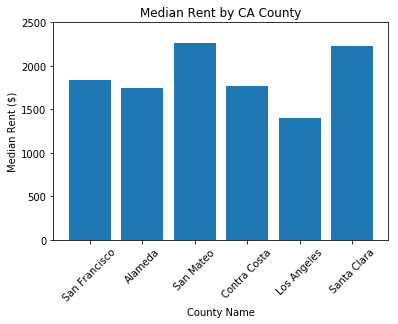

In [29]:
#plot in-CA median rents

x_axis = np.arange(len(ca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, ca_med_rent)
plt.xticks(tick_locations, ca_cty_name, rotation=45)

plt.title("Median Rent by CA County")
plt.xlabel("County Name")
plt.ylabel("Median Rent ($)")
plt.ylim(0, 2500)

(0, 2500)

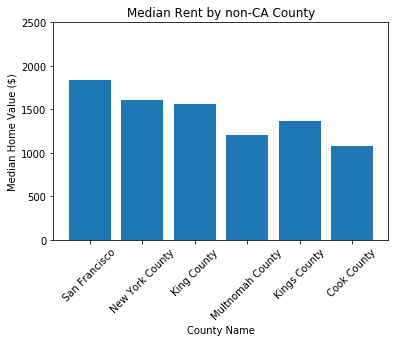

In [30]:
#plot non-CA median rents

x_axis = np.arange(len(nonca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, non_ca_med_rent)
plt.xticks(tick_locations, nonca_cty_name, rotation=45)

plt.title("Median Rent by non-CA County")
plt.xlabel("County Name")
plt.ylabel("Median Home Value ($)")
plt.ylim(0, 2500)

In [31]:
#follow the same process for home owner rate

ca_own_rate = []
home_own_var = "DP04_0046PE"
    
for county_id, state_id in zip(ca_cty_fips, ca_st_fips):
    own_rate = requests.get(f"{base_url}?get={home_own_var}&for=county:{county_id}&in=state:{state_id}").json()
    ca_own_rate.append(float(own_rate[1][0]))
    
in_ca_df["Home Own Rate"] = ca_own_rate
print(in_ca_df)

nonca_own_rate = []
home_own_var = "DP04_0046PE"
    
for county_id, state_id in zip(nonca_cty_fips, nonca_st_fips):
    own_rate = requests.get(f"{base_url}?get={home_own_var}&for=county:{county_id}&in=state:{state_id}").json()
    nonca_own_rate.append(float(own_rate[1][0]))
    
non_ca_df["Home Own Rate"] = nonca_own_rate
print(non_ca_df)

     County Name State_FIPS County_FIPS  Med_Home_Value  Med_Rent  \
0  San Francisco         06         075         1104100      1836   
1        Alameda         06         001          781000      1745   
2      San Mateo         06         081         1087100      2259   
3   Contra Costa         06         013          642300      1766   
4    Los Angeles         06         037          588700      1402   
5    Santa Clara         06         085          971300      2229   

   Home Own Rate  
0           36.5  
1           53.3  
2           59.1  
3           67.8  
4           45.6  
5           56.8  
        County Name State_FIPS County_FIPS  Med_Home_Value  Med_Rent  \
0     San Francisco         06         075         1104100      1836   
1   New York County         36         061          976100      1601   
2       King County         53         033          563600      1555   
3  Multnomah County         41         051          393900      1199   
4      Kings County    

(0, 75)

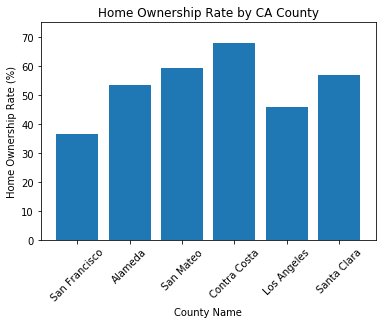

In [32]:
#plot in-CA home own rates

x_axis = np.arange(len(ca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, ca_own_rate)
plt.xticks(tick_locations, ca_cty_name, rotation=45)

plt.title("Home Ownership Rate by CA County")
plt.xlabel("County Name")
plt.ylabel("Home Ownership Rate (%)")
plt.ylim(0, 75)

(0, 75)

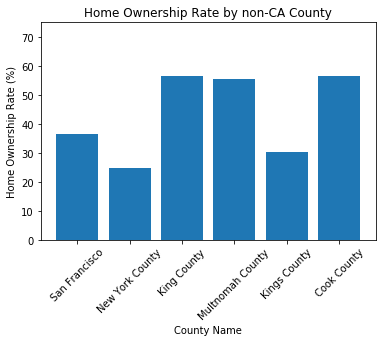

In [33]:
#plot non-CA home own rates

x_axis = np.arange(len(nonca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, nonca_own_rate)
plt.xticks(tick_locations, nonca_cty_name, rotation=45)

plt.title("Home Ownership Rate by non-CA County")
plt.xlabel("County Name")
plt.ylabel("Home Ownership Rate (%)")
plt.ylim(0, 75)

# 2017 Median Household Incomes for Top 5 Counties

# Wage data from census "QuickFacts" utility

Documentation of the Journey

1. Use the graphical interface to input up to 6 locations (by city, county, state, etc) 
Reference:  https://www.census.gov/quickfacts/fact/table/US/PST045218

** The only data cleaning done in Excel was to add (for out-of-state),  Travis County TX, (Austin is located there),  which was added manually to the "non_CA_counties.csv" files

2. Import the csv
*  Method: pd.read_csv

In [34]:
# Rebeccas Files to load
CA_counties = pd.read_csv("CA_counties.csv")
non_CA_counties = pd.read_csv("non_CA_counties.csv")

#Display just the within CA data
CA_counties.head()

,Fact,Fact Note,"San Francisco County, California","Value Note for San Francisco County, California","Alameda County, California","Value Note for Alameda County, California","San Mateo County, California","Value Note for San Mateo County, California","Contra Costa County, California","Value Note for Contra Costa County, California","Los Angeles County, California","Value Note for Los Angeles County, California","Santa Clara County, California","Value Note for Santa Clara County, California"
0,"Population estimates, July 1, 2018, (V2018)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Population estimates, July 1, 2017, (V2017)",NaN,"884,363",NaN,"1,663,190",NaN,"771,410",NaN,"1,147,439",NaN,"10,163,507",NaN,"1,938,153",NaN
2,"Population estimates base, April 1, 2010, (V2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Population estimates base, April 1, 2010, (V2...",NaN,"805,193",NaN,"1,510,261",NaN,"718,500",NaN,"1,049,200",NaN,"9,818,696",NaN,"1,781,671",NaN
4,"Population, percent change - April 1, 2010 (es...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data CleanUp Steps

* Reduce the data size and clean up the naming (for easier reference later on)

* df.drop()-    Drop columns all the columns which have no important data
* df.dropna() - Drop rows with NaN
* df.reset_index() - Reset the index because we had dropped out a few rows
* df[:x] - Drop rows, only keep x rows
* df.rename()  - Rename the colums with shorter names so the plots look ok

In [35]:
# Clean up the raw data - 
CA_counties.drop(columns = ['Fact Note'], inplace=True)
CA_counties.drop(columns = ['Value Note for San Francisco County, California'], inplace=True)
CA_counties.drop(columns = ['Value Note for Alameda County, California'], inplace=True)
CA_counties.drop(columns = ['Value Note for San Mateo County, California'], inplace=True)
CA_counties.drop(columns = ['Value Note for Contra Costa County, California'], inplace=True)
CA_counties.drop(columns = ['Value Note for Los Angeles County, California'], inplace=True)
CA_counties.drop(columns = ['Value Note for Santa Clara County, California'], inplace=True)

non_CA_counties.drop(columns = ['Fact Note'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for San Francisco County, California'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for King County, Washington'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for New York County (Manhattan Borough), New York'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for Multnomah County, Oregon'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for Kings County (Brooklyn Borough), New York'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for Cook County, Illinois'], inplace=True)
non_CA_counties.drop(columns = ['Value Note for Travis County, Texas'], inplace=True)

# Remove the rows which have NaNs,  doing inplace needed
CA_counties.dropna(inplace=True)
non_CA_counties.dropna(inplace=True)

# Reset the index to keep everything in order, drop = True means that the original index will be discarded
# Do this because we need to have one DF that shows the row number as a reference (later code)
# Reference:  https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame

CA_counties.reset_index(drop=True, inplace=True)
non_CA_counties.reset_index(drop=True, inplace=True)


# Only keep the top 62 rows of data

CA_counties = CA_counties[:62]
non_CA_counties = non_CA_counties[:62]

non_CA_counties.head()

,Fact,"San Francisco County, California","New York County (Manhattan Borough), New York","King County, Washington","Multnomah County, Oregon","Kings County (Brooklyn Borough), New York","Cook County, Illinois","Travis County, Texas"
0,"Population estimates, July 1, 2017, (V2017)","884,363","1,664,727","2,188,649","807,555","2,648,771","5,211,263","1,226,698"
1,"Population estimates base, April 1, 2010, (V2...","805,193","1,586,184","1,931,281","735,169","2,504,706","5,195,075","1,024,479"
2,"Population, percent change - April 1, 2010 (es...",9.80%,5.00%,13.30%,9.80%,5.80%,0.30%,19.70%
3,"Population, Census, April 1, 2010","805,235","1,585,873","1,931,249","735,334","2,504,700","5,194,675","1,024,266"
4,"Persons under 5 years, percent",4.50%,4.80%,5.90%,5.60%,7.30%,6.20%,6.50%


In [36]:
# Rename the columns to shorten the names for plotting, look at the DataFrame
CA_counties = CA_counties.rename(columns={"San Francisco County, California": "San Francisco",
                                 "Alameda County, California":"Alameda",
                                 "San Mateo County, California":"San Mateo",
                                 "Contra Costa County, California":"Contra Costa",
                                "Los Angeles County, California":"Los Angeles",
                                "Santa Clara County, California":"Santa Clara"
                                            })

non_CA_counties = non_CA_counties.rename(columns={"San Francisco County, California":"San Francisco",
                                 "New York County (Manhattan Borough), New York":"NY (Manhattan), NY",
                                 "King County, Washington":"King, WA",
                                "Multnomah County, Oregon":"Multnomah, OR",
                                "Kings County (Brooklyn Borough), New York":"Kings (Brooklyn), NY",
                                "Cook County, Illinois":"Cook, IL",
                                "Travis County, Texas":"Travis, TX"
                                })


# Move the Facts into the index to get it out of the way since we don't need to clean the numbers in that column
# Making a new DF ca_data,  so  you can always refer to ca_df to see the line number of the row
ca_data = CA_counties.set_index("Fact")
non_ca_data = non_CA_counties.set_index("Fact")

non_ca_data.head()

,San Francisco,"NY (Manhattan), NY","King, WA","Multnomah, OR","Kings (Brooklyn), NY","Cook, IL","Travis, TX"
Fact,,,,,,,
"Population estimates, July 1, 2017, (V2017)","884,363","1,664,727","2,188,649","807,555","2,648,771","5,211,263","1,226,698"
"Population estimates base, April 1, 2010, (V2017)","805,193","1,586,184","1,931,281","735,169","2,504,706","5,195,075","1,024,479"
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2017, (V2017)",9.80%,5.00%,13.30%,9.80%,5.80%,0.30%,19.70%
"Population, Census, April 1, 2010","805,235","1,585,873","1,931,249","735,334","2,504,700","5,194,675","1,024,266"
"Persons under 5 years, percent",4.50%,4.80%,5.90%,5.60%,7.30%,6.20%,6.50%


#### 4.0 Transform to numerical values 

Because the raw data in the csv is formatted with $, %, or ',' Pandas will read all data as objects into the DataFrame
*   Clean the entire table, the user can specify the specific data fact (row) they wish to use
     

*    df.replace    - Replace the %, $, ,  in the data to blank
*    df.apply(pd.to_numeric()) -- now change the objects in each column into numerics, "apply"  will apply to all cols
    * Use errors = 'coerce'  to force to an number.  If there are alphanumerics, they will become 'NaN's and you will lose the text.  In that case use errors = 'ignore'

In [37]:
# First remove all the $, % or ,  characters from the dataframe

cols = ca_data.columns
cols_nonca = non_ca_data.columns

ca_data[cols] = ca_data[cols].replace({'\$': '', ',': '', '\%':'', '\"': ''}, regex=True)
non_ca_data[cols_nonca]=non_ca_data[cols_nonca].replace({'\$': '', ',': '', '\%':'', '\"': ''}, regex=True)


# convert all objects to numerics
# reference:  https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns

clean_ca = ca_data.apply(pd.to_numeric, errors='coerce')
clean_ca.head()


non_ca_data = non_ca_data[cols_nonca].apply(pd.to_numeric, errors='coerce')
non_ca_data.head()

,San Francisco,"NY (Manhattan), NY","King, WA","Multnomah, OR","Kings (Brooklyn), NY","Cook, IL","Travis, TX"
Fact,,,,,,,
"Population estimates, July 1, 2017, (V2017)",884363.0,1664727.0,2188649.0,807555.0,2648771.0,5211263.0,1226698.0
"Population estimates base, April 1, 2010, (V2017)",805193.0,1586184.0,1931281.0,735169.0,2504706.0,5195075.0,1024479.0
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2017, (V2017)",9.8,5.0,13.3,9.8,5.8,0.3,19.7
"Population, Census, April 1, 2010",805235.0,1585873.0,1931249.0,735334.0,2504700.0,5194675.0,1024266.0
"Persons under 5 years, percent",4.5,4.8,5.9,5.6,7.3,6.2,6.5


#### Select the Data Fact to be plotted

* It's easier to specify the row by index

In [38]:
# Remove extraneous rows, keep only the row you want -- Median Wages
income = clean_ca[44:45]

# Remove extraneous rows, keep only Median Wages
income_nonCA = non_ca_data[44:45]

income

,San Francisco,Alameda,San Mateo,Contra Costa,Los Angeles,Santa Clara
Fact,,,,,,
"Median household income (in 2017 dollars), 2013-2017",96265.0,85743.0,105667.0,88456.0,61015.0,106761.0


In [39]:
# Now setup x and y axes for the bar plot

x_data = income.columns.tolist()   #  x_data has the list of counties to be plotted
x_axis = np.arange(len(x_data))

print(x_data)            # Check that this is a list of counties
print(income.values[0])   # this is accessing the first (and only) row of data


median_income = income.values[0]    #  [[1,2,3,4,5]] ->  row zero [0] [1,2,3,4,5]

# Now setup x and y axes for the bar plot

x2_data = income_nonCA.columns.tolist()   #  x_data has the list of counties to be plotted
x2_axis = np.arange(len(x2_data))

print(x2_data)            # Check that this is a list of counties
print(income_nonCA.values[0])   # this is accessing the first (and only) row of data


median_income_nonCA = income_nonCA.values[0]    #  [[1,2,3,4,5]] ->  row zero [0] [1,2,3,4,5]

['San Francisco', 'Alameda', 'San Mateo', 'Contra Costa', 'Los Angeles', 'Santa Clara']
[ 96265.  85743. 105667.  88456.  61015. 106761.]
['San Francisco', 'NY (Manhattan), NY', 'King, WA', 'Multnomah, OR', 'Kings (Brooklyn), NY', 'Cook, IL', 'Travis, TX']
[96265. 79781. 83571. 60369. 52782. 59426. 68350.]


##### 5.0      Create Bar Graph
*    df[x:y]        -Select the row or rows of data you need
*    x_axis = np.arange(len(x_data)) -Set the x axis
*                   -Set the values, extract if needed
*    plt.bar()      - plot the bar chart

Text(4.6,109000,'$106,761')

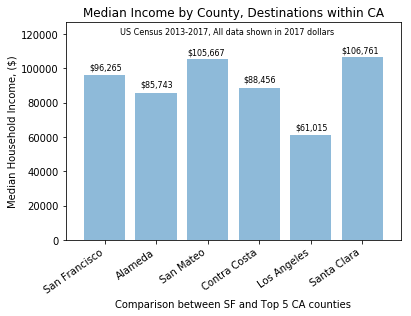

In [40]:
plt.bar(x_axis, median_income, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
#print(tick_locations)

plt.xticks(tick_locations, x_data, rotation="35", ha='right')   #ha indicates the alignment of the xlabel with the tick mark
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(median_income) + 20000)
plt.title("Median Income by County, Destinations within CA")
plt.xlabel("Comparison between SF and Top 5 CA counties")
plt.ylabel("Median Household Income, ($)")

# Add labels to give more context 

style = dict(size=8, color ='black')
plt.text(0.3,120000, "US Census 2013-2017, All data shown in 2017 dollars", **style)
plt.text(-0.3,99000, "$96,265", **style)
plt.text(0.7,89000, "$85,743", **style)
plt.text(1.6,108000, "$105,667", **style)
plt.text(2.7,92000, "$88,456", **style)
plt.text(3.7,64000, "$61,015", **style)
plt.text(4.6,109000, "$106,761", **style)

Text(5.6,71000,'$68,350')

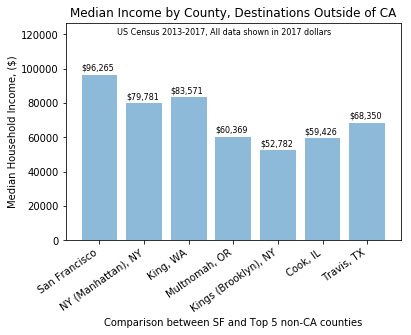

In [41]:
plt.bar(x2_axis, median_income_nonCA, alpha=0.5, align="center")

tick_locations = [value for value in x2_axis]
#print(tick_locations)

plt.xticks(tick_locations, x2_data, rotation="35", ha='right')   #ha indicates the alignment of the xlabel with the tick mark
plt.xlim(-0.75, len(x2_axis)-0.25)
plt.ylim(0, max(median_income) + 20000)
plt.title("Median Income by County, Destinations Outside of CA")
plt.xlabel("Comparison between SF and Top 5 non-CA counties")
plt.ylabel("Median Household Income, ($)")

# Add labels to give more context 

style = dict(size=8, color ='black')
plt.text(0.4,120000, "US Census 2013-2017, All data shown in 2017 dollars", **style)
plt.text(-0.4,99000, "$96,265", **style)
plt.text(0.6,82000, "$79,781", **style)
plt.text(1.6,86000, "$83,571", **style)
plt.text(2.6,63000, "$60,369", **style)
plt.text(3.6,55000, "$52,782", **style)
plt.text(4.6,62000, "$59,426", **style)
plt.text(5.6,71000, "$68,350", **style)

## Income and Mortgage data from census FactFinder Advanced Search utility

### Reference:  

* Use the US Census FactFinder - Advanced Search functionality to get detailed in the area of Employment (including income), Housing (including Mortgage information), and Population demographics.

* The utility is fairly easy to use -- but Warning - there is a LOT of data, and often times the data is repeated

* Recommendations:  Use the filtering and editing functions on the Advanced Search,  BEFORE creating your CSV file. 

    1. Select all counties of interest first as a filter.
    * Use the graphical interface to input as many locations as you want (by city, county, state, etc)
    * Once you have selected all the key locations,  you can save the query,  which saves time if you are going to do other analyses later on
    
    2. Edit out to the minimal data you need.  
    * The census provides the data with calculated error, or percent error.  Those can be filtered
    * Remove any columns of data you don't need.  It's difficult to change column names with very large datasets, so better to minimize the number of columns if possible
    
    The Income and Mortgage CSV in this file was filtered and edited on the Census website, with some additional description cleaning in Excel.

In [42]:
# Dependencies and Setup
#%matplotlib inline
#import matplotlib.pyplot as plt
#import pandas as pd
#import numpy as np

# Files to load
ACS_data = pd.read_csv("2017_income_mortgage.csv")

ACS_data.head()

,GEO.id,GEO.display-label,HC02_EST_VC03,HC02_EST_VC04,HC02_EST_VC05,HC02_EST_VC06,HC02_EST_VC07,HC02_EST_VC08,HC02_EST_VC09,HC01_EST_VC10,...,HC02_EST_VC24,HC02_EST_VC25,HC02_EST_VC26,HC02_EST_VC27,HC01_EST_VC28,HC02_EST_VC31,HC02_EST_VC32,HC02_EST_VC33,HC02_EST_VC34,GEO.id2
0,Id,Geography,"Mortgate Value - Less than $50,000","Mortgage value - $50,000 to $99,999","Mortgage Value - $100,000 to $299,999","Mortgage Value- $300,000 to $499,999","Mortgage Value $500,000 to $749,999","Mortgage Value - $750,000 to $999,999","Mortgage Value $1,000,000 or more",mortgage; Estimate; VALUE - Median (dollars),...,"% Household Income - $50,000 to $74,999","% Household Income - $75,000 to $99,999","% Household Income - $100,000 to $149,999","% Household Income - $150,000 or more",Median household income (dollars),% RATIO OF VALUE TO HOUSEHOLD INCOME Less th...,% RATIO OF VALUE TO HOUSEHOLD INCOME 2.0 to 2.9,%RATIO OF VALUE TO HOUSEHOLD INCOME - 3.0 to 3.9,%RATIO OF VALUE TO HOUSEHOLD INCOME - 4.0 or ...,Id2
1,0500000US06001,"Alameda County, California",1.2,0.6,7,20.8,31.3,21.8,17.2,662100,...,10,11.2,23.1,43.7,134673,7.7,15,17.9,59,6001
2,0500000US06013,"Contra Costa County, California",1.3,0.8,14.2,29.8,22.5,14.6,16.8,543400,...,11.9,12.2,22.9,39.2,124265,10.8,17.8,18.6,52.4,6013
3,0500000US06037,"Los Angeles County, California",1.6,0.9,13.1,34.7,25.9,10.7,13.1,498400,...,15.1,14.2,22,29,101782,8.6,14.6,16.4,59.8,6037
4,0500000US06075,"San Francisco County, California",1,0.4,2,5.8,21.8,24.4,44.5,943700,...,8.3,9.5,19.3,51.8,155398,5.8,9.8,13.1,70.9,6075


In [43]:
#Rename Columns to be more understandable
ACS_data.columns = ['ID', 
                    'County',
                    '% of Mortgages Valued at <$50K',
                         '% of Mortgages Valued at $50-$99K',
                         '% of Mortgages Valued at $100K-$299K',
                         '% of Mortgages Valued at $300K-$499K',
                         '% of Mortgages Valued at $500K-$749K',
                         '% of Mortgages Valued at $750K-$999K',
                         '% of Mortgages Valued at >$1M',
                        'Median Value of Mortgages ($)',
                        '% Household income <$10K',
                        '% Household income $10K-$24K',
                        '% Household income $25K-34K',
                        '% Household income $35K-$49K',
                        '% Household income $50K-$74K',
                        '% Household income $75K-$99K',
                        '% Household income $100K-$150K',
                       '% Household income >$150K',
                       '2017 Household Median Income ($)',
                       'Ratio of Mortgage Value to Income, % <2',
                       'Ratio of Mortgage Value to Income, % 2-2.9',
                       'Ratio of Mortgage Value to Income %, 3-3.9',
                        'Ratio of Mortgage Value to Income, % > 4.0',
                        'ID2']
ACS_data.drop(columns = ['ID'], inplace=True)  
ACS_data.set_index('County', inplace=True)                 

ACS_data.head()

,% of Mortgages Valued at <$50K,% of Mortgages Valued at $50-$99K,% of Mortgages Valued at $100K-$299K,% of Mortgages Valued at $300K-$499K,% of Mortgages Valued at $500K-$749K,% of Mortgages Valued at $750K-$999K,% of Mortgages Valued at >$1M,Median Value of Mortgages ($),% Household income <$10K,% Household income $10K-$24K,...,% Household income $50K-$74K,% Household income $75K-$99K,% Household income $100K-$150K,% Household income >$150K,2017 Household Median Income ($),"Ratio of Mortgage Value to Income, % <2","Ratio of Mortgage Value to Income, % 2-2.9","Ratio of Mortgage Value to Income %, 3-3.9","Ratio of Mortgage Value to Income, % > 4.0",ID2
County,,,,,,,,,,,,,,,,,,,,,
Geography,"Mortgate Value - Less than $50,000","Mortgage value - $50,000 to $99,999","Mortgage Value - $100,000 to $299,999","Mortgage Value- $300,000 to $499,999","Mortgage Value $500,000 to $749,999","Mortgage Value - $750,000 to $999,999","Mortgage Value $1,000,000 or more",mortgage; Estimate; VALUE - Median (dollars),"Percent HOUSEHOLD INCOME Less than $10,000","%Household Income $10,000 to $24,999",...,"% Household Income - $50,000 to $74,999","% Household Income - $75,000 to $99,999","% Household Income - $100,000 to $149,999","% Household Income - $150,000 or more",Median household income (dollars),% RATIO OF VALUE TO HOUSEHOLD INCOME Less th...,% RATIO OF VALUE TO HOUSEHOLD INCOME 2.0 to 2.9,%RATIO OF VALUE TO HOUSEHOLD INCOME - 3.0 to 3.9,%RATIO OF VALUE TO HOUSEHOLD INCOME - 4.0 or ...,Id2
"Alameda County, California",1.2,0.6,7,20.8,31.3,21.8,17.2,662100,1.3,3.1,...,10,11.2,23.1,43.7,134673,7.7,15,17.9,59,6001
"Contra Costa County, California",1.3,0.8,14.2,29.8,22.5,14.6,16.8,543400,1.4,3.4,...,11.9,12.2,22.9,39.2,124265,10.8,17.8,18.6,52.4,6013
"Los Angeles County, California",1.6,0.9,13.1,34.7,25.9,10.7,13.1,498400,2,5.1,...,15.1,14.2,22,29,101782,8.6,14.6,16.4,59.8,6037
"San Francisco County, California",1,0.4,2,5.8,21.8,24.4,44.5,943700,1.4,3.2,...,8.3,9.5,19.3,51.8,155398,5.8,9.8,13.1,70.9,6075


In [44]:
ACS_dataT = ACS_data.T

# Reset the index to keep everything in order, drop = True means that the original index will be discarded
# Do this because we need to have one DF that shows the row number as a reference (later code)
# Reference:  https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame

#ACS_dataT.reset_index(inplace=True)

# Remove the rows which have NaNs,  doing inplace needed
ACS_dataT.dropna(inplace=True)

# Only keep the top 25 rows of data
ACS_dataT = ACS_dataT[:25]

ACS_dataT.drop(columns = ['Geography'], inplace=True)  

ACS_dataT.head()

County,"Alameda County, California","Contra Costa County, California","Los Angeles County, California","San Francisco County, California","San Mateo County, California","Santa Clara County, California","Cook County, Illinois","Kings County, New York","New York County, New York","Multnomah County, Oregon","Travis County, Texas","King County, Washington"
% of Mortgages Valued at <$50K,1.2,1.3,1.6,1,1,1.1,2.9,1.7,1,1.9,2.2,1.5
% of Mortgages Valued at $50-$99K,0.6,0.8,0.9,0.4,0.5,0.6,8.6,1,0.8,0.8,3.2,0.7
% of Mortgages Valued at $100K-$299K,7,14.2,13.1,2,2,3.1,53.1,8.5,4.2,39.2,48.9,21.5
% of Mortgages Valued at $300K-$499K,20.8,29.8,34.7,5.8,6.7,10.9,21.8,23.5,11.7,36.2,26.2,33.5
% of Mortgages Valued at $500K-$749K,31.3,22.5,25.9,21.8,22.8,26.6,7.8,29.2,20.5,14.9,11.9,23.7


In [45]:
# Rename the columns, look at the DataFrame
ACS_dataT = ACS_dataT.rename(columns={"Geography":"Description",
                                      "San Francisco County, California": "San Francisco",
                                 "Alameda County, California":"Alameda",
                                 "San Mateo County, California":"San Mateo",
                                 "Contra Costa County, California":"Contra Costa",
                                "Los Angeles County, California":"Los Angeles",
                                "Santa Clara County, California":"Santa Clara",
                                      "New York County, New York":"New York (Manhattan), NY",
                                 "King County, Washington":"King, WA",
                                "Multnomah County, Oregon":"Multnomah, OR",
                                "Kings County, New York":"Kings (Brooklyn), NY",
                                "Cook County, Illinois":"Cook, IL",
                                "Travis County, Texas":"Travis, TX"
                                            })


ACS_dataT.head()

County,Alameda,Contra Costa,Los Angeles,San Francisco,San Mateo,Santa Clara,"Cook, IL","Kings (Brooklyn), NY","New York (Manhattan), NY","Multnomah, OR","Travis, TX","King, WA"
% of Mortgages Valued at <$50K,1.2,1.3,1.6,1,1,1.1,2.9,1.7,1,1.9,2.2,1.5
% of Mortgages Valued at $50-$99K,0.6,0.8,0.9,0.4,0.5,0.6,8.6,1,0.8,0.8,3.2,0.7
% of Mortgages Valued at $100K-$299K,7,14.2,13.1,2,2,3.1,53.1,8.5,4.2,39.2,48.9,21.5
% of Mortgages Valued at $300K-$499K,20.8,29.8,34.7,5.8,6.7,10.9,21.8,23.5,11.7,36.2,26.2,33.5
% of Mortgages Valued at $500K-$749K,31.3,22.5,25.9,21.8,22.8,26.6,7.8,29.2,20.5,14.9,11.9,23.7


In [46]:
# Move the Facts into the index to get it out of the way since we don't need to clean the numbers in that column
# Making a new DF ca_data,  so  you can always refer to ca_df to see the line number of the row
#ca_data = CA_counties.set_index("Fact")

# Clean the $ and % and " signs from multiple columns, first put the columns put them in a list
# Reference:  https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

cols = ACS_dataT.columns

# pass cols to df.replace(), specifying $,%" and , to be replaced by blanks

ACS_dataT[cols] = ACS_dataT[cols].replace({'\$': '', ',': '', '\%':'', '\"': ''}, regex=True)


# convert all objects to numerics
# reference:  https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
#cols = ACS_dataT.columns[ACS_dataT.dtypes.eq('object')]
ACS_dataT = ACS_dataT[cols].apply(pd.to_numeric, errors='ignore')
ACS_dataT.head()

County,Alameda,Contra Costa,Los Angeles,San Francisco,San Mateo,Santa Clara,"Cook, IL","Kings (Brooklyn), NY","New York (Manhattan), NY","Multnomah, OR","Travis, TX","King, WA"
% of Mortgages Valued at <$50K,1.2,1.3,1.6,1.0,1.0,1.1,2.9,1.7,1.0,1.9,2.2,1.5
% of Mortgages Valued at $50-$99K,0.6,0.8,0.9,0.4,0.5,0.6,8.6,1.0,0.8,0.8,3.2,0.7
% of Mortgages Valued at $100K-$299K,7.0,14.2,13.1,2.0,2.0,3.1,53.1,8.5,4.2,39.2,48.9,21.5
% of Mortgages Valued at $300K-$499K,20.8,29.8,34.7,5.8,6.7,10.9,21.8,23.5,11.7,36.2,26.2,33.5
% of Mortgages Valued at $500K-$749K,31.3,22.5,25.9,21.8,22.8,26.6,7.8,29.2,20.5,14.9,11.9,23.7


In [47]:
#Reorder the columns - SF first, then CA by migration amount,  then out-of-CA by migration amount
ACS_dataT = ACS_dataT.reindex(columns = ['San Francisco','Alameda','San Mateo',
                                         'Contra Costa','Los Angeles','Santa Clara',
                                         'New York (Manhattan), NY', 'King, WA',
                                         'Multnomah, OR', 'Kings (Brooklyn), NY',
                                          'Cook, IL', 'Travis, TX'
                                        ])
ACS_dataT.head()
income = ACS_dataT.iloc[8:16,0:12]


In [48]:
# Setup bins for the stacked bar plot
under_10K = income.iloc[0,0:12]
to_24K = income.iloc[1,0:12]
to_34K = income.iloc[2,0:12]
to_49K = income.iloc[3,0:12]
to_74K = income.iloc[4,0:12]
to_99K = income.iloc[5,0:12]
to_149K = income.iloc[6,0:12]
above_150K = income.iloc[7,0:12]

x_data = income.columns.tolist()   #  x_data has the list of categories to be plotted
x_axis = np.arange(len(x_data))
x_data, x_axis

(['San Francisco',
  'Alameda',
  'San Mateo',
  'Contra Costa',
  'Los Angeles',
  'Santa Clara',
  'New York (Manhattan), NY',
  'King, WA',
  'Multnomah, OR',
  'Kings (Brooklyn), NY',
  'Cook, IL',
  'Travis, TX'],
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

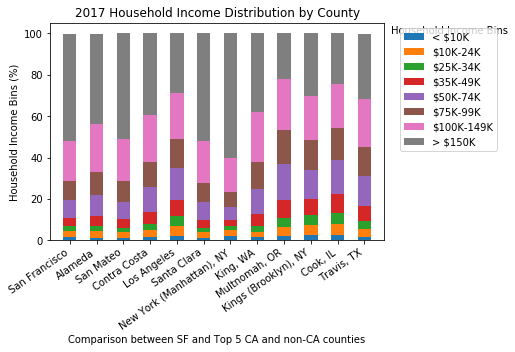

In [49]:
width = 0.50

p0 = plt.bar(x_axis,under_10K,width)
p1 = plt.bar(x_axis,to_24K,width,bottom = under_10K)
p2 = plt.bar(x_axis,to_34K,width,bottom = under_10K + to_24K)
p3 = plt.bar(x_axis,to_49K,width,bottom = under_10K + to_24K + to_34K)
p4 = plt.bar(x_axis,to_74K,width,bottom = under_10K + to_24K + to_34K + to_49K)
p5 = plt.bar(x_axis,to_99K,width,bottom = under_10K + to_24K + to_34K + to_49K + to_74K)
p6 = plt.bar(x_axis,to_149K,width,bottom = under_10K + to_24K + to_34K + to_49K + to_74K + to_99K)
p7 = plt.bar(x_axis,above_150K,width,bottom = under_10K + to_24K + to_34K + to_49K + to_74K + to_99K + to_149K)

plt.legend((p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]),
           ('< $10K', '$10K-24K', "$25K-34K", '$35K-49K', '$50K-74K', '$75K-99K', '$100K-149K', '> $150K '),loc='upper right',
          bbox_to_anchor =(1.35, 1.0))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_data, rotation="35", ha='right')   #ha indicates the alignment of the xlabel with the tick mark

plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("2017 Household Income Distribution by County")
plt.xlabel("Comparison between SF and Top 5 CA and non-CA counties")
plt.ylabel("Household Income Bins (%)")

# Add labels to give more context 

style = dict(size=10, color ='black')
plt.text(12,100, "Household Income Bins", **style)
plt.show()


In [50]:
mortgage_amt = ACS_dataT.iloc[0:7,0:12]

# Setup bins for the mortgage stacked bar plot
below_50K = mortgage_amt.iloc[0,0:12]
to_99K = mortgage_amt.iloc[1,0:12]
to_299K = mortgage_amt.iloc[2,0:12]
to_499K = mortgage_amt.iloc[3,0:12]
to_749K = mortgage_amt.iloc[4,0:12]
to_999K = mortgage_amt.iloc[5,0:12]
above_1M = mortgage_amt.iloc[6,0:12]


x_data = mortgage_amt.columns.tolist()   #  x_data has the list of categories to be plotted
x_axis = np.arange(len(x_data))


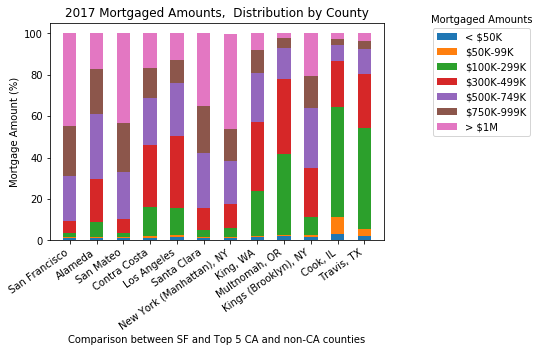

In [51]:
p0 = plt.bar(x_axis,below_50K,width)
p1 = plt.bar(x_axis,to_99K,width,bottom = below_50K)
p2 = plt.bar(x_axis,to_299K,width,bottom = below_50K + to_99K)
p3 = plt.bar(x_axis,to_499K,width,bottom = below_50K + to_99K + to_299K)
p4 = plt.bar(x_axis,to_749K,width,bottom = below_50K + to_99K + to_299K + to_499K)
p5 = plt.bar(x_axis,to_999K,width,bottom = below_50K + to_99K + to_299K + to_499K + to_749K)
p6 = plt.bar(x_axis,above_1M,width,bottom = below_50K + to_99K + to_299K + to_499K + to_749K + to_999K)

plt.legend((p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]),
           ('< $50K', '$50K-99K', '$100K-299K', '$300K-499K','$500K-749K', '$750K-999K', '> $1M '),loc='upper right',
          bbox_to_anchor =(1.45, 1.0))

plt.xticks(tick_locations, x_data, rotation="35", ha='right')   #ha indicates the alignment of the xlabel with the tick mark

plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("2017 Mortgaged Amounts,  Distribution by County")
plt.xlabel("Comparison between SF and Top 5 CA and non-CA counties")
plt.ylabel("Mortgage Amount (%)")

# Add labels to give more context 

style = dict(size=10, color ='black')
plt.text(13.5,105, "Mortgaged Amounts", **style)
plt.show()


In [52]:
ratio_debt_to_income = ACS_dataT.iloc[17:21,0:12]
ratio_debt_to_income



County,San Francisco,Alameda,San Mateo,Contra Costa,Los Angeles,Santa Clara,"New York (Manhattan), NY","King, WA","Multnomah, OR","Kings (Brooklyn), NY","Cook, IL","Travis, TX"
"Ratio of Mortgage Value to Income, % <2",5.8,7.7,4.9,10.8,8.6,6.3,12.9,15.2,15.8,9.3,37.1,32.7
"Ratio of Mortgage Value to Income, % 2-2.9",9.8,15.0,8.4,17.8,14.6,10.7,15.5,23.6,24.9,11.2,24.6,27.7
"Ratio of Mortgage Value to Income %, 3-3.9",13.1,17.9,13.3,18.6,16.4,15.5,15.2,19.7,20.4,12.5,13.4,15.2
"Ratio of Mortgage Value to Income, % > 4.0",70.9,59.0,73.0,52.4,59.8,67.1,55.6,41.2,38.4,66.4,24.3,23.6


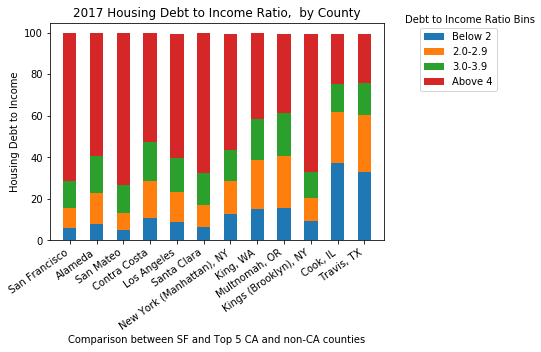

In [53]:
# Setup bins for the debt to income ratio stacked bar plot
below_2 = ratio_debt_to_income.iloc[0,0:12]
to_3 = ratio_debt_to_income.iloc[1,0:12]
to_4 = ratio_debt_to_income.iloc[2,0:12]
above_4 = ratio_debt_to_income.iloc[3,0:12]

p0 = plt.bar(x_axis,below_2,width)
p1 = plt.bar(x_axis,to_3,width,bottom = below_2)
p2 = plt.bar(x_axis,to_4,width,bottom = below_2 + to_3)
p3 = plt.bar(x_axis,above_4,width,bottom = below_2 + to_3 + to_4)


plt.legend((p0[0], p1[0], p2[0], p3[0]),
           ('Below 2', '2.0-2.9', '3.0-3.9', 'Above 4'),loc='upper right',
          bbox_to_anchor =(1.35, 1.0))

plt.xticks(tick_locations, x_data, rotation="35", ha='right')   #ha indicates the alignment of the xlabel with the tick mark

plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("2017 Housing Debt to Income Ratio,  by County")
plt.xlabel("Comparison between SF and Top 5 CA and non-CA counties")
plt.ylabel("Housing Debt to Income")

# Add labels to give more context 

style = dict(size=10, color ='black')
plt.text(12.5,105, "Debt to Income Ratio Bins", **style)
plt.show()

## Conclusions for Household Income

* San Francisco county incomes are not the highest;  they are similar to, but less than San Mateo and Santa Clara Counties.
* Looking at the income distribution - in SF, San Mateo, Santa Clara, and Manhattan more than 50% of the households have enjoy >$150,000 annual income. 

* There is roughly a -15% difference in household income, between SF and East Bay (East Bay having relatively lower median income) and +15% difference between SF and South Bay (South Bay having relatively higher median incomes)


* Thus the Median Income trend matches well to the Median House Values - higher median income areas tend to also have higher median housing values.  Not surprisingly, mortgage amounts and housing debt to income ratio follows the same trends. 


* Median Incomes in Los Angeles County are significantly lower than in the Bay area  (~ > 30% lower), likely to the diversity of the industries, employers and population size


* Outside of California,  Median Incomes are substantially lower than San Francisco County, from 15% to 50% lower.  This is likely do to the diversity of industries and employers


## Notes 

* Income refers to income from all sources (i.e. what the IRS expects to report), including examples such as
    * wages
    * self-employment income
    * social security income
    * interest income
    * capital gains from stock selling
    * rental income
    * retirement income
    
* Household refers to the total income from all persons > 15 years old

* House refers to all types of Owner-Occupied Housing of all varieties including examples such as
    * Condominimums
    * Single Family homes
    * Duplexes
    * Boats
    * RVs
    
    

Industry

In [54]:
#Stefan's number of businesses analysis

#convert a column to float
df_original_1["EMPSZES.id"] = pd.to_numeric(df_original_1["EMPSZES.id"]) 
df_original_2["EMPSZES.id"] = pd.to_numeric(df_original_2["EMPSZES.id"]) 
df_original_3["EMPSZES.id"] = pd.to_numeric(df_original_3["EMPSZES.id"]) 

#filter by industry sizec(df_original["EMPSZES.id"]) 
all_businesses_df_1 = df_original_1.loc[df_original_1["EMPSZES.id"] == 1, :] 
all_businesses_df_2 = df_original_2.loc[df_original_2["EMPSZES.id"] == 1, :] 
all_businesses_df_3 = df_original_3.loc[df_original_3["EMPSZES.id"] == 1, :] 

#group by industry type
df_groupedby_GEOID_1 = df_original_1.groupby('NAICS.id') 
df_groupedby_GEOID_2 = df_original_2.groupby('NAICS.id') 
df_groupedby_GEOID_3 = df_original_3.groupby('NAICS.id') 

#take the sum of the group
df_quick_sum_1 = df_groupedby_GEOID_1["ESTAB"].sum() 
df_quick_sum_2 = df_groupedby_GEOID_2["ESTAB"].sum() 
df_quick_sum_3 = df_groupedby_GEOID_3["ESTAB"].sum() 

#filter by industry type
all_sizes_df_1 = all_businesses_df_1.loc[all_businesses_df_1["NAICS.id"] == "0", :] 
all_sizes_df_2 = all_businesses_df_2.loc[all_businesses_df_2["NAICS.id"] == "0", :] 
all_sizes_df_3 = all_businesses_df_3.loc[all_businesses_df_3["NAICS.id"] == "0", :]

all_sizes_df_1 = all_sizes_df_1.set_index("GEO.id2")
all_sizes_df_2 = all_sizes_df_2.set_index("GEO.id2")
all_sizes_df_3 = all_sizes_df_3.set_index("GEO.id2")
#result is a dataframe only containing only one county code per "total # of establishments"


In [55]:
#create lists to hold values in interest from our 11 selected counties and append the values using the FIPS code

toCal2014 = []
toCal2015 = []
toCal2016 = []
outCal2014 = []
outCal2015 = []
outCal2016 = []

toCal2014.append(all_sizes_df_1.loc[6075, "ESTAB" ])
toCal2015.append(all_sizes_df_2.loc[6075, "ESTAB" ])
toCal2016.append(all_sizes_df_3.loc[6075, "ESTAB" ])

toCal2014.append(all_sizes_df_1.loc[6037, "ESTAB" ])
toCal2015.append(all_sizes_df_2.loc[6037, "ESTAB" ])
toCal2016.append(all_sizes_df_3.loc[6037, "ESTAB" ])

toCal2014.append(all_sizes_df_1.loc[6085, "ESTAB" ])
toCal2015.append(all_sizes_df_2.loc[6085, "ESTAB" ])
toCal2016.append(all_sizes_df_3.loc[6085, "ESTAB" ])

toCal2014.append(all_sizes_df_1.loc[6001, "ESTAB" ])
toCal2015.append(all_sizes_df_2.loc[6001, "ESTAB" ])
toCal2016.append(all_sizes_df_3.loc[6001, "ESTAB" ])

toCal2014.append(all_sizes_df_1.loc[6013, "ESTAB" ])
toCal2015.append(all_sizes_df_2.loc[6013, "ESTAB" ])
toCal2016.append(all_sizes_df_3.loc[6013, "ESTAB" ])

toCal2014.append(all_sizes_df_1.loc[6081, "ESTAB" ])
toCal2015.append(all_sizes_df_2.loc[6081, "ESTAB" ])
toCal2016.append(all_sizes_df_3.loc[6081, "ESTAB" ])

outCal2014.append(all_sizes_df_1.loc[6075, "ESTAB" ])
outCal2015.append(all_sizes_df_2.loc[6075, "ESTAB" ])
outCal2016.append(all_sizes_df_3.loc[6075, "ESTAB" ])

outCal2014.append(all_sizes_df_1.loc[17031, "ESTAB" ])
outCal2015.append(all_sizes_df_2.loc[17031, "ESTAB" ])
outCal2016.append(all_sizes_df_3.loc[17031, "ESTAB" ])

outCal2014.append(all_sizes_df_1.loc[36061, "ESTAB" ])
outCal2015.append(all_sizes_df_2.loc[36061, "ESTAB" ])
outCal2016.append(all_sizes_df_3.loc[36061, "ESTAB" ])

outCal2014.append(all_sizes_df_1.loc[53033, "ESTAB" ])
outCal2015.append(all_sizes_df_2.loc[53033, "ESTAB" ])
outCal2016.append(all_sizes_df_3.loc[53033, "ESTAB" ])

outCal2014.append(all_sizes_df_1.loc[36047, "ESTAB" ])
outCal2015.append(all_sizes_df_2.loc[36047, "ESTAB" ])
outCal2016.append(all_sizes_df_3.loc[36047, "ESTAB" ])

outCal2014.append(all_sizes_df_1.loc[41051, "ESTAB" ])
outCal2015.append(all_sizes_df_2.loc[41051, "ESTAB" ])
outCal2016.append(all_sizes_df_3.loc[41051, "ESTAB" ])

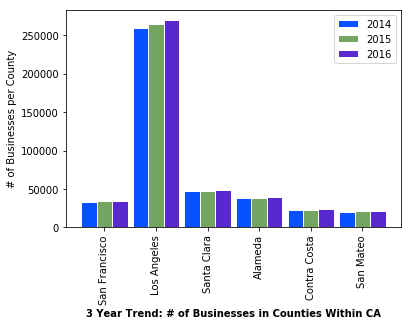

In [56]:
# set width of bar
barWidth = 0.3
 
# Set position of bar on X axis
r1 = np.arange(len(toCal2014))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, toCal2014, color='#0652ff', width=barWidth, edgecolor='white', label = '2014')
plt.bar(r2, toCal2015, color='#74a662', width=barWidth, edgecolor='white', label = '2015')
plt.bar(r3, toCal2016, color='#5729ce', width=barWidth, edgecolor='white', label = '2016')
 
# Add xticks on the middle of the group bars
plt.xlabel('3 Year Trend: # of Businesses in Counties Within CA', fontweight='bold')
plt.ylabel("# of Businesses per County")
plt.xticks([r + barWidth for r in range(len(toCal2014))], ['San Francisco', 'Los Angeles', 'Santa Clara', 'Alameda', 'Contra Costa', 'San Mateo'], rotation = 'vertical')
plt.legend()
# Create legend & Show graphic
plt.show()

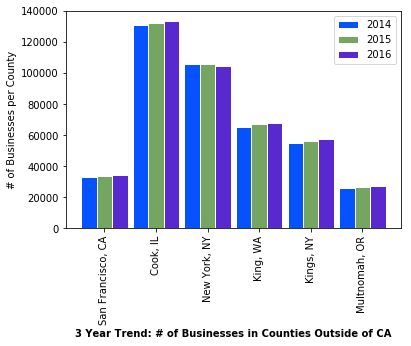

In [57]:
#Generate Grouped-Bar Graphs

# set width of bar
barWidth = 0.3
 
# Set position of bar on X axis
r1 = np.arange(len(toCal2014))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, outCal2014, color='#0652ff', width=barWidth, edgecolor='white', label = '2014')
plt.bar(r2, outCal2015, color='#74a662', width=barWidth, edgecolor='white', label = '2015')
plt.bar(r3, outCal2016, color='#5729ce', width=barWidth, edgecolor='white', label = '2016')
 
# Add xticks on the middle of the group bars
plt.xlabel('3 Year Trend: # of Businesses in Counties Outside of CA', fontweight='bold')
plt.ylabel("# of Businesses per County")
plt.xticks([r + barWidth for r in range(len(toCal2014))], ['San Francisco, CA', 'Cook, IL', 'New York, NY', 'King, WA', 'Kings, NY', 'Multnomah, OR'], rotation = 'vertical')
plt.legend()
# Create legend & Show graphic
plt.show()

References
Reference for Median Household Income:  https://www.census.gov/quickfacts/fact/table/US/PST045218

Conclusions

Within California:
* The biggest migration path from SF County is to neighboring counties, in particular the East Bay (Alameda, Contra Costa), and South Bay (San Mateo, Santa Clara). Mostly people with median incomes are more likely to leave SF.  

* Home ownership is one major attraction - as shown by the Home ownership data.  SF County has the lowest percentage of home ownership (35%) in CA for this study.  SF County home ownership is similar to other high density counties such as Manhattan and Brooklyn.  All other counties have much higher home ownership -- typically 50% or more home ownership.

* With the East Bay - the major attraction is the lower median housing price, in 2017, nearly 35%-45% less than SF county.

* With the South Bay - the median prices are not much lower than SF county. However, the demographic age and marital status data shows that most counties, including South Bay have more married folks, and more children.  The South Bay has very high home values - and has the highest incomes (+15% more than SF County). Homes are likely to be larger, or having backyards or green spaces, and better school districts, as a primary attraction, despite the very high prices.

* Los Angeles is the only Southern CA county in the top 5 of CA destinations. Analysis of number of Industries in Los Angeles shows LA has very large number of establishments.  This suggests that access to more opportunities for family members to be a potential attraction.

* San Francisco county incomes are high; similar to San Mateo and Santa Clara Counties. There is roughly a -15% difference in household income, between SF and East Bay (East Bay having relatively lower median income) and +15% difference between SF and South Bay (South Bay having relatively higher median incomes). Thus, the Median Income trend matches well to the Median House Values - higher median income areas tend to also have higher median housing values.

* Median Incomes in Los Angeles County are significantly lower than in the Bay area (~ > 30% lower), likely attributable to the number and diversity of industries and employers, as well as the population size





Outside of California:
* Outside of California, Median Incomes are substantially lower than San Francisco County, from 15% to 50% lower.  This is likely do to with the diversity of industries, employers and population size.   However, if tech workers can telecommute, then they likely will enjoy SF County incomes, while living in substantially lower housing cost areas. Many people who move to NY are not for affordability reasons as NY has a lower income and comparable rents to SF. Which results with less money at the end of the month. They're not necessarily getting higher quality housing as they would in Oregon or Washington.

* Renting versus owning: In SF County, since housing values are so high, many are renters.  The median monthly rents are very similar in East Bay, and even higher in South Bay.  Thus, renting in a different Bay Area county is not likely a major attraction to move.  However, in LA or in other states, especially in Multnomah, Brooklyn, and Cook County, significant monthly rental savings are likely an attraction. People looking to own a home will move to counties in Washing, Oregon, and Illinois, but those who move to NY counties are less likely to own.

* Significant savings in housing, due to lower home values, requiring lower mortgage amounts (or alternatively getting more house for the same house value), and attractive housing debt-to=income ratio are all compelling reasons for out-of-CA migration.

* Outside of California, one main attraction to be move is the much higher number of industries in the counties, which could provide jobs to family members in the household who are not in the tech industry. In Manhattan they're actually closing more companies than creating. Chicago is the most appealing market to start a business in.



Notes

* Income refers to income from all sources (i.e. what the IRS expects to report), including examples such as
    * wages
    * self-employment income
    * social security income
    * interest income
    * capital gains from stock selling
    * rental income
    
* Household refers to the total income from all persons > 15 years old

* House refers to all types of Owner-Occupied Housing of all varieties including examples such as
    * Condominimums
    * Single Family homes
    * Duplexes
    * Boats
    * RVs
    

Keep in Mind:


The questions you and your group found interesting, and what motivated you to answer them
Where and how you found the data you used to answer these questions
The data exploration and cleanup process (accompanied by your Jupyter Notebook)
The analysis process (accompanied by your Jupyter Notebook)
Your conclusions. This should include a numerical summary as well as visualizations of that summary
Discuss the implications of your findings. This is where you get to have an open-ended discussion about what your findings "mean".
